## Intro
The data in this lesson was obtained from the site gapminder.org. The variables included are:
- Aged 15+ Employment Rate (%)
- Life Expectancy (years)
- GDP/capita (US$, inflation adjusted)
- Primary school completion (% of boys)
- Primary school completion (% of girls)

In this process we will not focus on data analysis process. Instead we will do buch of exercises showing what NumPy and Pandas can do. 

## Questions

How Polish employment rate changed compared to old EU average?

What are the highest and the lowest employment levels?
- Which countires have them?
- Where is Poland on that spectrum?

How these variables relate to each other?

Are there consistent trends across countries?

---

Which countries have the biggest and the lowest life expectancy and what is it?

What are 10 coutries with highest GDP and what are 10 with the lowest?

How GDP changes over years - world average?

How GDP changes over years - Europe average?

How primary school completion differs in Europe? 

How primary school completion differs between sexes in Europe, Africa and Middle East?


How Polish employment rate changed over time?



## Compare Python code from Lesson 1 to Pandas and NumPy data loading

In [31]:
import unicodecsv

In [32]:
def read_csv(path):
    with open(path, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        data = list(reader)
    return data

%timeit daily_engagement = read_csv("daily_engagement.csv")
daily_engagement = read_csv("daily_engagement.csv")

1 loop, best of 3: 865 ms per loop


In [33]:
def get_unique_students(data):
     return set([data_row['acct'] for data_row in data])

%timeit unique_engagement_students = get_unique_students(daily_engagement)
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)

10 loops, best of 3: 22.8 ms per loop


1237

### NumPy

In [34]:
import numpy as np

In [35]:
%timeit daily_engagement = np.loadtxt("daily_engagement.csv", dtype=str, delimiter=",", skiprows=1)
daily_engagement = np.loadtxt("daily_engagement.csv", dtype=str, delimiter=",", skiprows=1)

1 loop, best of 3: 1.16 s per loop


In [36]:
%timeit np.unique(daily_engagement[:, 0])
unique_engagement_students = np.unique(daily_engagement[:, 0])
len(unique_engagement_students)

The slowest run took 4.97 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 24.3 ms per loop


1237

### Pandas

In [37]:
import pandas as pd

In [38]:
%timeit daily_engagement = pd.read_csv("daily_engagement.csv")
daily_engagement = pd.read_csv("daily_engagement.csv")

10 loops, best of 3: 107 ms per loop


In [39]:
%timeit daily_engagement['acct'].unique()
unique_engagement_students = daily_engagement['acct'].unique()
len(unique_engagement_students)

1000 loops, best of 3: 853 µs per loop


1237

## One-dimensional data structures

Both Pandas and NumPy have special data structures, made to represent one-dimesional data: Array (NumPy) and Series (Pandas).

NumPy Array:
- are simpler 

Pandas Series: 
- have more features then Pandas Series
- built on top of NumPy arrays

Both NumPy and Pandas have data structures to represent two-dimensional data.

## NumPy arrays and Python Lists

In many ways NumPy Arrays are similar to Python Lists:
- it contains a sequence of elements and those can be anything 

Similarities:
- Access elements by position: data[0]
- Access a range of elements using slicing: data[4:10]
- Use for loops: for x in data

Differences:
- Each element should have same type (string, int, boolean, etc.)
- Convenient functions: mean(), std()
- Can be multidimensional

In [35]:
# First 20 countries with employment data
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    ## nice formatting!
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

In [38]:
# Accessing elements
print(countries[0])
print(countries[3])

Afghanistan
Angola


In [39]:
# Slicing
print(countries[0:3])
print(countries[:3])
print(countries[17:])
print(countries[:])

['Afghanistan' 'Albania' 'Algeria']
['Afghanistan' 'Albania' 'Algeria']
['Bhutan' 'Bolivia' 'Bosnia and Herzegovina']
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina']


In [41]:
# Element types
print(countries.dtype)
print(employment.dtype)
print(np.array([0, 1, 2, 3]).dtype)
print(np.array([1.0, 1.5, 2.0, 2.5]).dtype)
print(np.array(['AL', 'AK', 'AZ', 'AR', 'CA']).dtype)

<U22
float64
int64
float64
<U2


In [42]:
# Looping. 
for country in countries:
    print(country)

Afghanistan
Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina


In [43]:
print(employment.mean())
print(employment.std())
print(employment.max())
print(employment.sum())

58.6850000385
9.33826911369
75.69999695
1173.70000077


In [46]:
def max_employment(countries, employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    '''
    max_country = countries[employment.argmax()]      # Replace this with your code
    max_value = employment.max()   # Replace this with your code

    return (max_country, max_value)

max_employment(countries, employment)

('Angola', 75.699996949999999)

## Vectorized Operations

### Addition
A vector is a list of numbers.

NumPy array behaves as linear algebra vector addition.

Python lists '+' sign implements lists concatenations.

In [47]:
# Python list
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [48]:
# NumPy array
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

### Multiplication

In [50]:
# Python array
[1, 2, 3] * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [51]:
# NumPy array
np.array([1, 2, 3]) * 3

array([3, 6, 9])

### More vectorized operations

Math operations:
- Add: +
- Subtract: -
- Multiply: *
- Divide: /
- Exponentiate: **

Logical operations (array should be boolean!):
- And: &
- Or: |
- Not: ~

Comparison operations:
- Greater: >
- Greater or equal: >=
- Less: <
- Less or equal: <=
- Equal: ==
- Not equal: !=

In NumPy, a & b performs a bitwise and of a and b. This is not necessarily the same as a logical and, if you wanted to see if matching terms in two integer vectors were non-zero. However, if a and b are both arrays of booleans, rather than integers, bitwise and and logical and are the same thing. If you want to perform a logical and on integer vectors, then you can use the NumPy function np.logical_and(a, b) or convert them into boolean vectors first.

Similarly, a | b performs a bitwise or, and ~a performs a bitwise not. However, if your arrays contain booleans, these will be the same as performing logical or and logical not. NumPy also has similar functions for performing these logical operations on integer-valued arrays.

In [55]:
# Arithmetic operations between 2 NumPy arrays.

a = np.array([1, 2, 3, 4])
b = np.array([1, 2, 1, 2])

print(a + b)
print(a - b)
print(a * b)
print(a / b)
print(a**b)

[2 4 4 6]
[0 0 2 2]
[1 4 3 8]
[ 1.  1.  3.  2.]
[ 1  4  3 16]


In [56]:
# Arithmetic operations between a NumPy array and a single number.
a = np.array([1, 2, 3, 4])
b = 2

print(a + b)
print(a - b)
print(a * b)
print(a / b)
print(a**2)

[3 4 5 6]
[-1  0  1  2]
[2 4 6 8]
[ 0.5  1.   1.5  2. ]
[ 1  4  9 16]


In [63]:
# Logical operations with NumPy arrays.
a = np.array([True, True, False, False])
b = np.array([True, False, True, False])

print(a & b)
print(a | b)
print(~a)

print(a & True)
print(a & False)

print(a | True)
print(a | False)

[ True False False False]
[ True  True  True False]
[False False  True  True]
[ True  True False False]
[False False False False]
[ True  True  True  True]
[ True  True False False]


In [64]:
# Comparison operations between 2 NumPy Arrays.
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

print(a > b)
print(a >= b)
print(a < b)
print(a <= b)
print(a == b)
print(a != b)

[False False False  True  True]
[False False  True  True  True]
[ True  True False False False]
[ True  True  True False False]
[False False  True False False]
[ True  True False  True  True]


In [66]:
# Comparison operations between a NumPy array and a single number
a = np.array([1, 2, 3, 4])
b = 2

print(a > b)
print(a >= b)
print(a < b)
print(a <= b)
print(a == b)
print(a != b)

[False False  True  True]
[False  True  True  True]
[ True False False False]
[ True  True False False]
[False  True False False]
[ True False  True  True]


In [69]:
# First 20 countries with school completion data
countries = np.array([
       'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Austria','Azerbaijan',
       'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia',
       'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde'
])

# Female school completion rate in 2007 for those 20 countries
female_completion = np.array([
    97.35583,  104.62379,  103.02998,   95.14321,  103.69019,
    98.49185,  100.88828,   95.43974,   92.11484,   91.54804,
    95.98029,   98.22902,   96.12179,  119.28105,   97.84627,
    29.07386,   38.41644,   90.70509,   51.7478 ,   95.45072
])

# Male school completion rate in 2007 for those 20 countries
male_completion = np.array([
     95.47622,  100.66476,   99.7926 ,   91.48936,  103.22096,
     97.80458,  103.81398,   88.11736,   93.55611,   87.76347,
    102.45714,   98.73953,   92.22388,  115.3892 ,   98.70502,
     37.00692,   45.39401,   91.22084,   62.42028,   90.66958
])

def overall_completion_rate(female_completion, male_completion):
    '''
    Fill in this function to return a NumPy array containing the overall
    school completion rate for each country. The arguments are NumPy
    arrays giving the female and male completion of each country in
    the same order.
    '''
    return (female_completion + male_completion) / 2.

overall_completion_rate(female_completion, male_completion)

array([  96.416025,  102.644275,  101.41129 ,   93.316285,  103.455575,
         98.148215,  102.35113 ,   91.77855 ,   92.835475,   89.655755,
         99.218715,   98.484275,   94.172835,  117.335125,   98.275645,
         33.04039 ,   41.905225,   90.962965,   57.08404 ,   93.06015 ])

## Standardizing Data
https://classroom.udacity.com/courses/ud170/lessons/5435548805/concepts/54301490200923

How does one data point compare to the rest?
e.g. how does employment in U.S. compares to other countries

To answer, convert each data point to number of standard deviations away from the mean.

In 2007:
- mean employment rate: 58.6%
- standard deviation: 10.5%

- United States: 62.3% 
- Difference between the employment rate and the mean employment rate was: 3.7% or 0.35 sd

- Mexico: 57.9%
- Difference between the employment rate and the mean employment rate was: -0.7% or -0.067 sd



In [40]:
# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

def standardize_data(values):
    '''
    Fill in this function to return a standardized version of the given values,
    which will be in a NumPy array. Each value should be translated into the
    number of standard deviations that value is away from the mean of the data.
    (A positive number indicates a value higher than the mean, and a negative
    number indicates a value lower than the mean.)
    '''
    return (values - values.mean()) / values.std()

standardize_data(employment)

array([-0.31965231, -0.780123  , -0.87650077,  1.82207181, -0.03051941,
       -1.99019768,  0.30144772, -0.16973184,  0.23719615,  0.84758731,
        0.18365304,  1.00821665,  0.87971351, -0.56595055, -1.07996476,
       -0.20185762,  1.38301845, -0.03051941,  1.2545153 , -1.87240259])

## NumPy Index Arrays

Suppose you have two arrays of the same length and the second one contains booleans.

In [4]:
data = np.array([1, 2, 3, 4, 5])
index = np.array([False, False, True, True, True]) # an index array
data[index]

array([3, 4, 5])

In [82]:
index = data > 2
data[index]

array([3, 4, 5])

In [6]:
# more pythonic
data[data > 2]
# data is an array
# comparing array to a single number is a vectorized operation that returns an array of booleans
# then you have to remember about index arrays

array([3, 4, 5])

In [13]:
# Using index arrays
a = np.array([1, 2, 3, 4])
b = np.array([True, True, False, False])
print(a[b])
print(a[np.array([True, True, False, False])])

[1 2]
[1 2]


In [14]:
# Creating the index array using vectorized operations
a = np.array([1, 2, 3, 2, 1])
b = (a >= 2)
print(a[b])
print(a[a >= 2])


[2 3 2]
[2 3 2]


In [15]:
# Creating the index array using vectorized operations on another array
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 3, 2, 1])

print(b == 2)
print(a[b == 2])


[False  True False  True False]
[2 4]


In [16]:
def mean_time_for_paid_students(time_spent, days_to_cancel):
    '''
    Fill in this function to calculate the mean time spent in the classroom
    for students who stayed enrolled at least (greater than or equal to) 7 days.
    Unlike in Lesson 1, you can assume that days_to_cancel will contain only
    integers (there are no students who have not canceled yet).
    
    The arguments are NumPy arrays. time_spent contains the amount of time spent
    in the classroom for each student, and days_to_cancel contains the number
    of days until each student cancel. The data is given in the same order
    in both arrays.
    '''
    return time_spent[days_to_cancel >= 7].mean()

# Time spent in the classroom in the first week for 20 students
time_spent = np.array([
       12.89697233,    0.        ,   64.55043217,    0.        ,
       24.2315615 ,   39.991625  ,    0.        ,    0.        ,
      147.20683783,    0.        ,    0.        ,    0.        ,
       45.18261617,  157.60454283,  133.2434615 ,   52.85000767,
        0.        ,   54.9204785 ,   26.78142417,    0.
])

# Days to cancel for 20 students
days_to_cancel = np.array([
      4,   5,  37,   3,  12,   4,  35,  38,   5,  37,   3,   3,  68,
     38,  98,   2, 249,   2, 127,  35
])

mean_time_for_paid_students(time_spent, days_to_cancel)

41.054003485454537

## + vs. +=

`+=` operates in-place

`+` does not operates in-place

In [18]:
import numpy as np
a = np.array([1, 2, 3, 4])
b = a # a is b True
a += np.array([1, 1, 1, 1]) # updates both a and b
b

array([2, 3, 4, 5])

In [19]:
import numpy as np
a = np.array([1, 2, 3, 4])
b = a # a is b True
a = a + np.array([1, 1, 1, 1]) # + operator first creates new array - copy of a - and updates it
b # b is not updated

array([1, 2, 3, 4])

Operations that are not in-place are much easier to think about.

E.g. + is more clear.

## Slicing 

Slicing makes things fast but you have to bve careful.

In [40]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
slice = a[:3]
slice[0] = 100
print(a)

[100   2   3   4   5]


# Pandas Series

## Intro

A series is similar to a NumPy array, but with extra functionality.

e.g. s.describe()

Silimarities:
* Accessing elements: indexing, slicing
* Looping
* Convenient functions s.mean(), s.max()
* Vectorized operations s1 + s2
* Implemented in C - fast!

In [1]:
import pandas as pd

countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]


In [35]:
# Life expectancy and gdp data in 2007 for 20 countries.
life_expectancy = pd.Series(life_expectancy_values, index=countries)
gdp = pd.Series(gdp_values)


In [36]:
life_expectancy

Albania                74.7
Algeria                75.0
Andorra                83.4
Angola                 57.6
Antigua and Barbuda    74.6
Argentina              75.4
Armenia                72.3
Australia              81.5
Austria                80.2
Azerbaijan             70.3
Bahamas                72.1
Bahrain                76.4
Bangladesh             68.1
Barbados               75.2
Belarus                69.8
Belgium                79.4
Belize                 70.8
Benin                  62.7
Bhutan                 67.3
Bolivia                70.6
dtype: float64

In [4]:
gdp

0      1681.613910
1      2155.485231
2     21495.805083
3       562.987685
4     13495.127466
5      9388.688523
6      1424.190562
7     24765.548902
8     27036.487332
9      1945.637549
10    21721.618410
11    13373.219940
12      483.970868
13     9783.984173
14     2253.464111
15    25034.666923
16     3680.916429
17      366.044967
18     1175.926387
19     1132.213880
dtype: float64

In [5]:
# Accessing elements and slicing
print(life_expectancy[0])
print(gdp[3:6])

74.7
3      562.987685
4    13495.127466
5     9388.688523
dtype: float64


In [7]:
# Looping
for country_life_expectancy in life_expectancy:
    print(country_life_expectancy)

74.7
75.0
83.4
57.6
74.6
75.4
72.3
81.5
80.2
70.3
72.1
76.4
68.1
75.2
69.8
79.4
70.8
62.7
67.3
70.6


In [8]:
# Pandas functions.
print(life_expectancy.mean())
print(life_expectancy.std())
print(gdp.max())
print(gdp.sum())

72.86999999999999
6.213999474869968
27036.4873319
182957.59832967003


In [9]:
# Vectorized operations and index arrays
a = pd.Series([1, 2, 3, 4])
b = pd.Series([1, 2, 1, 2])
print(a + b)
print(a * b)
print(a >= 3)
print(a[a >= 3])

0    2
1    4
2    4
3    6
dtype: int64
0    1
1    4
2    3
3    8
dtype: int64
0    False
1    False
2     True
3     True
dtype: bool
2    3
3    4
dtype: int64


In [28]:
 
def variable_correlation(variable1, variable2):
    '''
    Fill in this function to calculate the number of data points for which
    the directions of variable1 and variable2 relative to the mean are the
    same, and the number of data points for which they are different.
    Direction here means whether each value is above or below its mean.
    
    You can classify cases where the value is equal to the mean for one or
    both variables however you like.
    
    Each argument will be a Pandas series.
    
    For example, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([4, 5, 6, 7]), then the output would be (4, 0).
    This is because 1 and 4 are both below their means, 2 and 5 are both
    below, 3 and 6 are both above, and 4 and 7 are both above.
    
    On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
    This is because 1 is below its mean but 7 is above its mean, and
    so on.
    '''
    v1_mean = variable1.mean()
    v2_mean = variable2.mean()
    
    mark_series = ((variable1 < v1_mean) & (variable2 < v2_mean)) | \
                  ((variable1 > v1_mean) & (variable2 > v2_mean))
    num_same_direction = mark_series.sum()
    num_different_direction = len(variable1) - mark_series.sum()
    
    return (num_same_direction, num_different_direction)

In [29]:
variable_correlation(pd.Series([1, 2, 3, 4]), pd.Series([4, 5, 6, 7]))

(4, 0)

In [30]:
variable_correlation(pd.Series([1, 2, 3, 4]), pd.Series([7, 6, 5, 4]))

(0, 4)

In [31]:
variable_correlation(life_expectancy, gdp)

(17, 3)

## Series Index

Main difference between NumPy Array and Pandas Series is that Series are using indexes.

NumPy arrays are like souped-up Python lists.

A Pandas Series is like a cross between a list and a dictionary.

In a list elements are stored in order and you access them by the position. 

In a dictionary you can look up values by keys.

In [37]:
life_expectancy

Albania                74.7
Algeria                75.0
Andorra                83.4
Angola                 57.6
Antigua and Barbuda    74.6
Argentina              75.4
Armenia                72.3
Australia              81.5
Austria                80.2
Azerbaijan             70.3
Bahamas                72.1
Bahrain                76.4
Bangladesh             68.1
Barbados               75.2
Belarus                69.8
Belgium                79.4
Belize                 70.8
Benin                  62.7
Bhutan                 67.3
Bolivia                70.6
dtype: float64

We can call life_expectancy both by index (like in a list) and by index name (like in a dictionary).

In [39]:
life_expectancy.loc['Angola']

57.600000000000001

This way I can call Angola value without knowing which position in a Series it is.


Other way is to call element by position.

There are two ways to do that - implicit and explicit.



In [42]:
life_expectancy[0]

74.700000000000003

In [43]:
life_expectancy.iloc[0]

74.700000000000003

By default indexes are numbered like in a regular list.

In [41]:
pd.Series(data=[2, 2, 3, 4])

0    2
1    2
2    3
3    4
dtype: int64

## Vectorized operations and series indexes.

When you add two NumPy arrays, you're adding by position.

What happens if you add two series with different indexes?

In [48]:
# Addition when indexes are the same
s1 = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
s2 = pd.Series([10, 20, 30, 40], index=["a", "b", "c", "d"])
s1 + s2

a    11
b    22
c    33
d    44
dtype: int64

In [50]:
# Indexes have same elements in a different order
s1 = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
s2 = pd.Series([10, 20, 30, 40], index=["b", "d", "a", "c"])
s1 + s2

a    31
b    12
c    43
d    24
dtype: int64

In [51]:
# Indexes overlap, but do not have exactly the same elements
s1 = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
s2 = pd.Series([10, 20, 30, 40], index=["c", "d", "e", "f"])
s1 + s2

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64

In [53]:
# Indexes do not overlap
s1 = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
s2 = pd.Series([10, 20, 30, 40], index=["e", "f", "g", "h"])
s1 + s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64

Values in series vectorized operations are matched based on index - not position.

If index value is present in one series but not another the resulting value will be NaN.

## Filling missing values.


In [56]:
# Indexes overlap, but do not have exactly the same elements
s1 = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
s2 = pd.Series([10, 20, 30, 40], index=["c", "d", "e", "f"])
res = s1 + s2
res

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64

In [57]:
res.dropna()

c    13.0
d    24.0
dtype: float64

Alternative solution to get rid of nans by filling nans with 0.

In [59]:
res.fillna(0)

a     0.0
b     0.0
c    13.0
d    24.0
e     0.0
f     0.0
dtype: float64

## Non built-in calculations - apply

apply() takes a series and a function, and returns a new series.

Thanks to apply() we can use non built-in functions on series.

In [60]:
s = pd.Series([1, 2, 3, 4, 5])
s.apply(lambda x: x + 1)

0    2
1    3
2    4
3    5
4    6
dtype: int64

In [70]:
names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])

def reverse_name(name):
    split_name = name.split()
    return split_name[1] + ", " + split_name[0]
    
def reverse_names(names):
    '''
    Fill in this function to return a new series where each name
    in the input series has been transformed from the format
    "Firstname Lastname" to "Lastname, FirstName".
    
    Try to use the Pandas apply() function rather than a loop.
    '''
    return names.apply(reverse_name)

In [69]:
reverse_name('Zinedine Zidane')

'Zidane, Zinedine'

In [71]:
reverse_names(names)

0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

## Plotting in Pandas

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
s = pd.Series(data=[1, 2, 3, 2, 4, 5, 3, 4])
s

0    1
1    2
2    3
3    2
4    4
5    5
6    3
7    4
dtype: int64

Use regular Matplotlib interface.

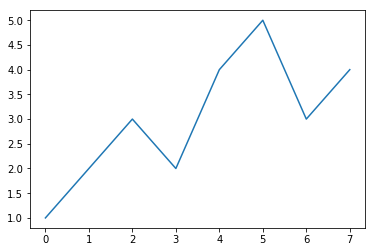

In [81]:
plt.plot(s)

(array([ 1.,  0.,  2.,  0.,  0.,  2.,  0.,  2.,  0.,  1.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

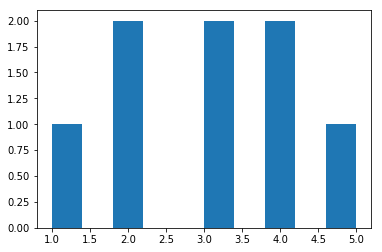

In [82]:
plt.hist(s)

Use Pandas visualization interface.

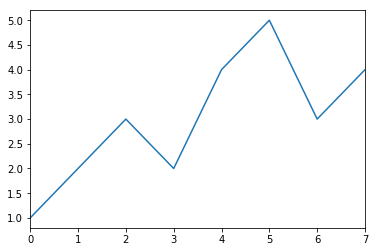

In [79]:
s.plot()

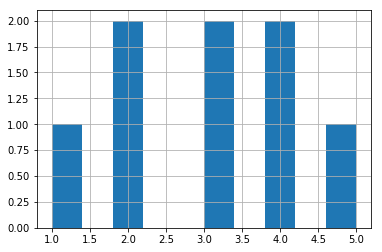

In [80]:
s.hist()

There's no difference between these two in this case, but sometimes the Pandas wrapper can be more convenient. For example, you can make a line plot of a series using data.plot(). The index of the Series will be used for the x-axis and the values for the y-axis.

